In [4]:

from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)

# Imports

In [5]:
import os
import numpy as np
import keras
import tensorflow as tf


In [113]:
from keras.datasets import cifar10
from IPython.display import display
from keras.preprocessing.image import array_to_img
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import TensorBoard

import itertools

from sklearn.metrics import confusion_matrix

from time import strftime

import matplotlib.pyplot as plt
%matplotlib inline

# constant(label names)

In [102]:
LOG_DIR='tensorboard_cifar_logs/'

LABEL_NAMES=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_PIXELS=IMAGE_HEIGHT*IMAGE_WIDTH
IMAGE_CHANNEL=3
TOTAL_INPUTS=IMAGE_PIXELS*3

VALIDATION_SIZE=10000
SMALL_TRAINING_SIZE=1000

NR_CLASSES=10

In [8]:
type(cifar10)

module

# load dataset

In [9]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [10]:
type(X_train)

numpy.ndarray

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_train[1].shape

(32, 32, 3)

# displaying image using ipython

In [13]:
pic_array = X_train[7]

In [14]:
pic=array_to_img(pic_array)

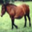

In [15]:
display(pic)

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[7][0]

7

In [18]:
LABEL_NAMES[y_train[7][0]]

'Horse'

# Display Image using matplotlib

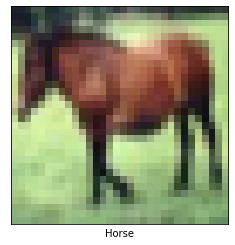

In [19]:
plt.imshow(X_train[7])
plt.xlabel(LABEL_NAMES[y_train[7][0]])  # as y_train shape is (50000, 1) we need first column(label values from 1-10)
plt.xticks([])
plt.yticks([])
plt.show()

# displaying 10 img in row 

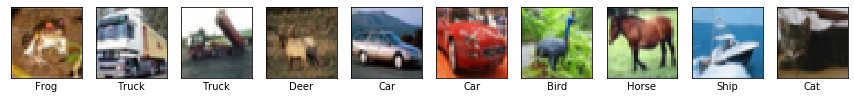

In [20]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train[i][0]])

In [21]:
no_of_images,x,y,channels = X_train.shape
print(f'Total_images = {no_of_images} \t | width = {x} \t | height = {y} \t | channels = {channels}')

Total_images = 50000 	 | width = 32 	 | height = 32 	 | channels = 3


In [22]:
X_test.shape

(10000, 32, 32, 3)

# preprocess data

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
type(X_train[0][0][0][0])   # total_number,width,height,channel

numpy.uint8

In [25]:
X_train,X_test= X_train/255.0 , X_test/255.0  #RGB max val = 255, reducing values between 0 to 1

In [26]:
type(X_train[0][0][0][0])

numpy.float64

In [27]:
X_train=X_train.reshape(len(X_train),TOTAL_INPUTS) #reducing shape of images (number,width,height,channel) to (number,combined input)

In [28]:
X_train.shape

(50000, 3072)

In [29]:
X_train[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [30]:
X_test=X_test.reshape(len(X_test),TOTAL_INPUTS)

In [31]:
X_test.shape

(10000, 3072)

# validation set

In [32]:
X_val=X_train[:VALIDATION_SIZE] #first 10000
y_val=y_train[:VALIDATION_SIZE]
X_val.shape

(10000, 3072)

In [33]:
X_training=X_train[VALIDATION_SIZE:]
y_training=y_train[VALIDATION_SIZE:]
X_training.shape


(40000, 3072)

# creating small dataset

In [34]:
X_train_small=X_training[:SMALL_TRAINING_SIZE]
y_train_small=y_training[:SMALL_TRAINING_SIZE]
X_train_small.shape

(1000, 3072)

# Creating Architecture of neural network

In [35]:
model_1=Sequential([
    Dense(units=128,input_dim=TOTAL_INPUTS,activation='relu',name='m1_hidden1'),
    Dense(units=64,activation='relu',name='m1_hidden2'),
    Dense(16,activation='relu',name='m1_hidden3'),
    Dense(10,activation='softmax',name='m1_output')
])

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
model_2=Sequential()
model_2.add(Dropout(rate=0.2,seed=42,input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128,activation='relu',name='m2_hidde1'))
model_2.add(Dense(64,activation='relu',name='m2_hidde2'))
model_2.add(Dense(16,activation='relu',name='m2_hidde3'))
model_2.add(Dense(10,activation='softmax',name='m2_output'))

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model_3=Sequential()
model_3.add(Dropout(rate=0.2,seed=42,input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128,activation='relu',name='m3_hidde1'))
model_3.add(Dropout(rate=0.25,seed=42))
model_3.add(Dense(64,activation='relu',name='m3_hidde2'))
model_3.add(Dense(16,activation='relu',name='m3_hidde3'))
model_3.add(Dense(10,activation='softmax',name='m3_output'))

model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


each neuron has bias along with weights that also includes in parameter calculation

In [40]:
(32*32*3*128 + 128)+(128*64 + 64)+(64*16 + 16)+(16*10 + 10)

402810

In [41]:
def get_tensorboard(model_name):
    
    folder_name=f'{model_name} at {strftime("%d_%m_%Y %H_%M_%S")}'
    dir_paths=os.path.join(LOG_DIR,folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Succesfully created directory')

    return TensorBoard(log_dir=dir_paths,profile_batch = 100000000)
    
#get_tensorboard(model_1)

# folder_name=f'model_1 at {strftime("%m_%d_%Y %H_%M_%S")}'
# dir_paths=os.path.join(LOG_DIR,folder_name)
# os.makedirs(dir_paths)
#TensorBoard(log_dir=dir_paths)


# fitting model

In [42]:
batch_size=1000
epochs=100

In [43]:
# %%time
# model_1.fit(X_train_small,y_train_small,batch_size=batch_size,verbose=0,validation_data=(X_val,y_val),epochs=epochs,
#             callbacks=[get_tensorboard('model_1')])

In [44]:
%%time
model_1.fit(X_training,y_training,batch_size=batch_size,verbose=0,validation_data=(X_val,y_val),epochs=epochs,
            callbacks=[get_tensorboard('model_1')])

Succesfully created directory
Wall time: 3min 19s


In [45]:
%%time
model_2.fit(X_training,y_training,batch_size=batch_size,verbose=0,validation_data=(X_val,y_val),epochs=epochs,
            callbacks=[get_tensorboard('model_2')])

Succesfully created directory
Wall time: 5min 49s


In [46]:
%%time
model_3.fit(X_training,y_training,batch_size=batch_size,verbose=0,validation_data=(X_val,y_val),epochs=epochs,
            callbacks=[get_tensorboard('model_3')])

Succesfully created directory
Wall time: 5min 54s


# prediction on individual images

In [47]:
X_val.shape

(10000, 3072)

In [48]:
X_val[0].shape

(3072,)

In [49]:
test=np.expand_dims(X_val[0],axis=0)
test.shape

(1, 3072)

In [59]:
model_2.predict(test) #display probabilities of 10 classes

array([[0.131, 0.041, 0.101, 0.157, 0.151, 0.079, 0.256, 0.076, 0.005,
        0.003]], dtype=float32)

In [50]:
np.set_printoptions(precision=3) #to set 3 digit precision in output probabilities

In [56]:
model_2.predict_classes(test) # to get highest probability class out of 10 probabiities (predicted value)

array([6], dtype=int64)

In [57]:
y_val[0] #actual value

array([6], dtype=uint8)

In [83]:
# predicting set of 10 images
for number in range(20):
    test_img=np.expand_dims(X_val[number],axis=0)
    predicted_val=model_2.predict_classes(test_img)[0]
    print(f'predicted value {predicted_val} vs actual value {y_val[number][0]}')

predicted value 6 vs actual value 6
predicted value 9 vs actual value 9
predicted value 9 vs actual value 9
predicted value 4 vs actual value 4
predicted value 1 vs actual value 1
predicted value 7 vs actual value 1
predicted value 6 vs actual value 2
predicted value 7 vs actual value 7
predicted value 8 vs actual value 8
predicted value 2 vs actual value 3
predicted value 4 vs actual value 4
predicted value 2 vs actual value 7
predicted value 9 vs actual value 7
predicted value 8 vs actual value 2
predicted value 7 vs actual value 9
predicted value 8 vs actual value 9
predicted value 9 vs actual value 9
predicted value 6 vs actual value 3
predicted value 3 vs actual value 2
predicted value 6 vs actual value 6


In [62]:
X_val[0].shape

(3072,)

In [78]:
ex=np.expand_dims(X_val[5],axis=0)
model_2.predict_classes(ex)

array([4], dtype=int64)

In [79]:
y_val[5]

array([1], dtype=uint8)

# evaluating model

In [88]:
model_2.metrics_names

['loss', 'accuracy']

In [93]:
test_loss,test_accuracy=model_2.evaluate(X_test,y_test)
print(f'test loss is {test_loss:0.3} test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 0s 44us/sample - loss: 1.4314 - accuracy: 0.4926
test loss is 1.43 test accuracy is 49.3%


In [94]:
predictions=model_2.predict_classes(X_test)

In [95]:
conf_matrix=confusion_matrix(y_test,predictions)

In [96]:
conf_matrix.shape

(10, 10)

In [112]:
nr_rows=conf_matrix.shape[0]
nr_columns=conf_matrix.shape[1]

In [97]:
conf_matrix.max()

680

In [98]:
conf_matrix.min()

9

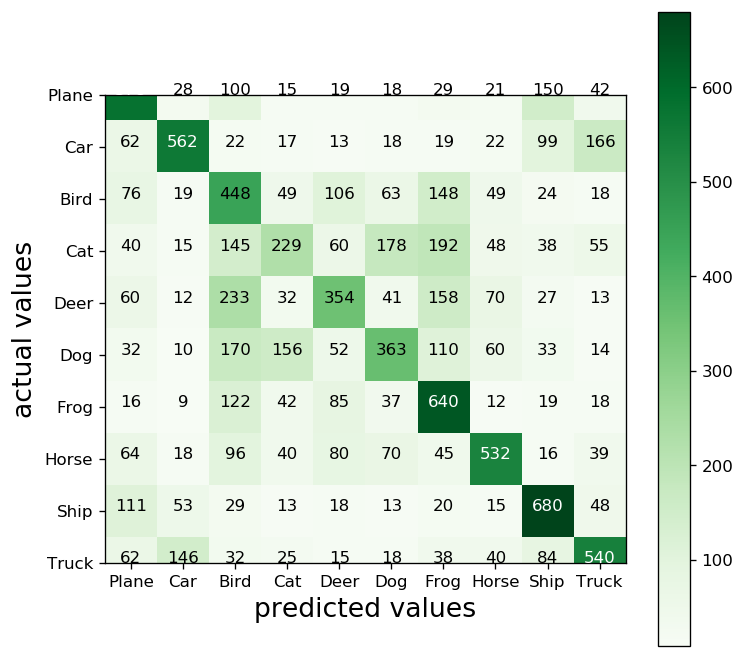

In [126]:
plt.figure(figsize=(7,7),dpi=120)

plt.imshow(conf_matrix,cmap=plt.cm.Greens)

tick_marks=np.arange(NR_CLASSES)
plt.xticks(tick_marks,LABEL_NAMES)
plt.yticks(tick_marks,LABEL_NAMES)
plt.xlabel('predicted values',fontsize=16)
plt.ylabel('actual values',fontsize=16)

for i,j in itertools.product(range(nr_rows),range(nr_columns)):
    plt.text(j,i,conf_matrix[i,j], horizontalalignment='center',
            color='white' if conf_matrix[i,j] > 450 else 'black')

plt.colorbar()
plt.show()

# calculating recall score,precision,f-score

'In confusion matrix diagonal : true positves . 
                        rows  : false negative  (predict true but its not true )
                        columns: false positive (predict false but its true)

recall_score = true positives /(true positive + false negative)

precision = true positive/(true positive + false positive) 

f-score=2*(precision * recall)/(precision + recall)

In [127]:
#true positives
np.diag(conf_matrix)

array([578, 562, 448, 229, 354, 363, 640, 532, 680, 540], dtype=int64)

In [129]:
#false positive(column)
np.sum(conf_matrix,axis=0)

array([1101,  872, 1397,  618,  802,  819, 1399,  869, 1170,  953],
      dtype=int64)

In [130]:
#false negative(row)
np.sum(conf_matrix,axis=1)

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64)

In [131]:
recall_score=np.diag(conf_matrix)/np.sum(conf_matrix,axis=1)
recall_score

array([0.578, 0.562, 0.448, 0.229, 0.354, 0.363, 0.64 , 0.532, 0.68 ,
       0.54 ])

In [132]:
precision_score=np.diag(conf_matrix)/np.sum(conf_matrix,axis=0)
precision_score

array([0.525, 0.644, 0.321, 0.371, 0.441, 0.443, 0.457, 0.612, 0.581,
       0.567])

In [137]:
avg_recall_score=np.mean(recall_score)
print(f'average recall score is {avg_recall_score:0.1%}')

avg_precision_score=np.mean(precision_score)
print(f'average precision is {avg_precision_score:0.1%}')

avg_f_score = 2*((avg_precision_score * avg_recall_score)/(avg_precision_score + avg_recall_score))
print(f'F-score is {avg_f_score:0.1%}')

average recall score is 49.3%
average precision is 49.6%
F-score is 49.4%
